In [111]:
import os
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets 
from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten
from matplotlib import pyplot as plt
import random

In [112]:
label_name = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def number_to_name(label_number):
    return label_name[label_number]
(X_train, Y_train) , (X_test,Y_test) = datasets.cifar10.load_data()

In [113]:
Y_train = Y_train.reshape(-1,)
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [114]:
Y_test = Y_test.reshape(-1,)
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [115]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

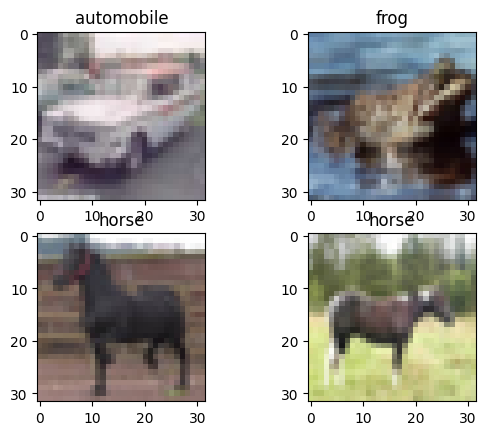

In [116]:
def print_images(n):
    f,axarr = plt.subplots(n,n)
    for i in range(n):
        for j in range(n):
            x = random.randrange(len(Y_train))
            axarr[i,j].imshow(X_train[x])
            axarr[i,j].set_title(number_to_name(Y_train[x]))
print_images(2)

In [117]:
X_train = X_train/255.0
X_test = X_test/255.0
Y_train_cat = tf.keras.utils.to_categorical(Y_train,num_classes = 10)
Y_test_cat = tf.keras.utils.to_categorical(Y_test,num_classes = 10)

In [118]:
inputs = tf.keras.layers.Input((32,32,3))
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(inputs)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.Dropout(0.2)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c1)


# Layer 2

# In[8]:


c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.Dropout(0.3)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c2)


# Layer 3

# In[9]:


c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
p3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c3)


# Layer 4

# In[10]:


c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c4)


# Layer 5

# In[11]:


c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)
p5 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c5)



# Layer 5

# In[16]:

c10 = tf.keras.layers.Conv2D(10,(1,1),activation='relu')(p5)
c10 = tf.keras.layers.Dropout(0.3)(c10)
c10= tf.keras.layers.Flatten()(p5)
c12= tf.keras.layers.Dense(128,activation='relu')(c10)
c12 = tf.keras.layers.Dropout(0.2)(c12)
outputs = tf.keras.layers.Dense(10,kernel_regularizer=tf.keras.regularizers.L1(0.01),activation = 'softmax')(c12)


# In[17]:


model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


# Model Checkpoint



callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir='logs'),
             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,min_lr=1e-6,patience=15,verbose=1),
            tf.keras.callbacks.ModelCheckpoint('CIFAR10_classification.h5',verbose=1,save_best_only=True)]


# In[ ]:


results = model.fit(X_train,Y_train,validation_split = 0.25,epochs=300,callbacks=callbacks)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_92 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_44 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_58 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 conv2d_93 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_45 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                          

2023-11-10 10:17:13.028688: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_7/dropout_58/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1171/1172 [============================>.] - ETA: 0s - loss: 1.9743 - accuracy: 0.3850
Epoch 1: val_loss improved from inf to 1.95937, saving model to CIFAR10_classification.h5
1172/1172 [==============================] - 22s 12ms/step - loss: 1.9740 - accuracy: 0.3849 - val_loss: 1.9594 - val_accuracy: 0.3454 - lr: 0.0010
Epoch 2/300
1170/1172 [============================>.] - ETA: 0s - loss: 1.4187 - accuracy: 0.5247
Epoch 2: val_loss improved from 1.95937 to 1.38201, saving model to CIFAR10_classification.h5
1172/1172 [==============================] - 13s 11ms/step - loss: 1.4185 - accuracy: 0.5248 - val_loss: 1.3820 - val_accuracy: 0.5450 - lr: 0.0010
Epoch 3/300
1172/1172 [==============================] - ETA: 0s - loss: 1.2228 - accuracy: 0.6029
Epoch 3: val_loss improved from 1.38201 to 1.30820, saving model to CIFAR10_classification.h5
1172/1172 [==============================] - 13s 11ms/step - loss: 1.2228 - accuracy: 0.6029 - val_loss: 1.3082 - val_accuracy: 0.5764 - lr: 

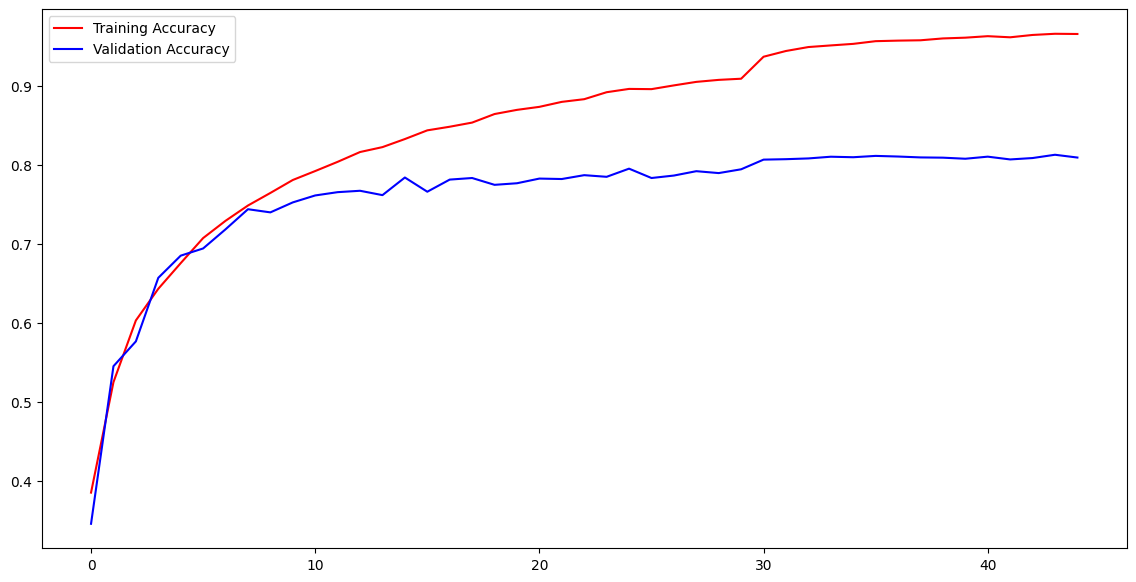

In [119]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

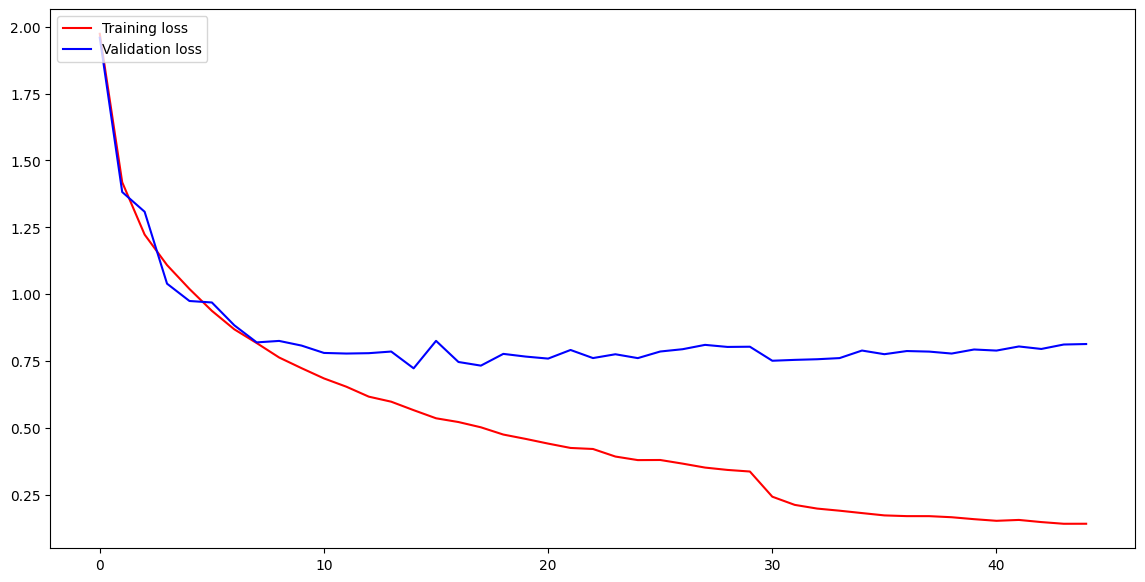

In [120]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

1/1 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'dog')

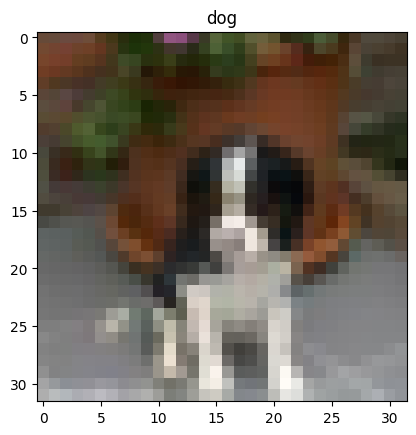

In [126]:
img = X_test[random.randrange(len(Y_test))]
plt.imshow(img)
img1 = np.expand_dims(img, axis=0)
y_pred_vals = model.predict(img1)
y_pred = y_pred_vals.argmax()
y_pred_name = number_to_name(y_pred)
plt.title(y_pred_name)

1/1 [==============================] - 0s 19ms/step


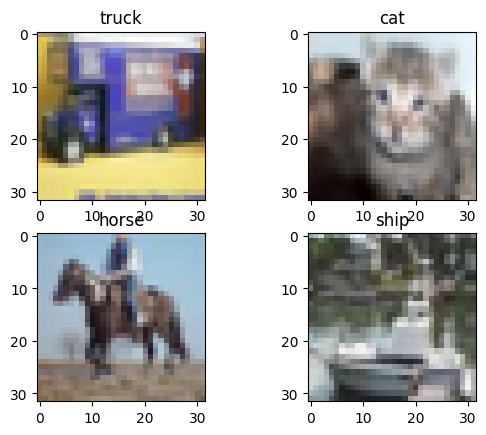

In [127]:
def prediction(n):
    f,axarr = plt.subplots(n,n)
    for i in range(n):
        for j in range(n):
            img = X_test[random.randrange(len(Y_test))]
            axarr[i,j].imshow(img)
            img1 = img.reshape(1,32,32,3)
            y_pred_vals = model.predict(img1)
            y_pred = y_pred_vals.argmax()
            y_pred_name = label_name[y_pred]
            axarr[i,j].set_title(y_pred_name)

prediction(2)

In [123]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape)
score = model.evaluate(X_test, Y_test, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

(10000, 32, 32, 3)
313/313 [==============================] - 1s 3ms/step - loss: 0.8398 - accuracy: 0.8051
Test loss: 0.8398414254188538
Test accuracy: 0.8051000237464905
